心得報告:

我一開始覺得傅立葉轉換很抽象，因為他說任何函數都能由sin和cos組成，並且將信號從時間域或空間域轉換到頻率域，單從這一點我很難想到傅立葉轉換在影像處理如何使用，但經過這次的實作，我才想到之前提到過影像的高頻、低頻區域的意義，然後用濾波器去篩選頻率域的信號，最後將頻率域反轉換到空間域，雖然結果而言和用濾波器直接作用在圖片上是一樣的，但是假如濾波器的大小很大(例如:31*31)那用傅立葉轉換的速度就會比起直接對圖片用濾波器快得多。

比較上述兩種做法的執行結果差異及執行速度:

整體而言，我覺得用butterworth濾波器的執行結果比較快，但其實兩者速度差不多。執行結果我覺得butterworth看起來比高斯濾波更模糊，不過這兩個濾波器都不會產生波紋，效果都蠻好的，此外高斯濾波器是低通濾波器，而butterworth濾波器可以是低通或高通濾波器，使用範圍較廣。




製作一Python程式，使用FFT製作Gaussian濾波器

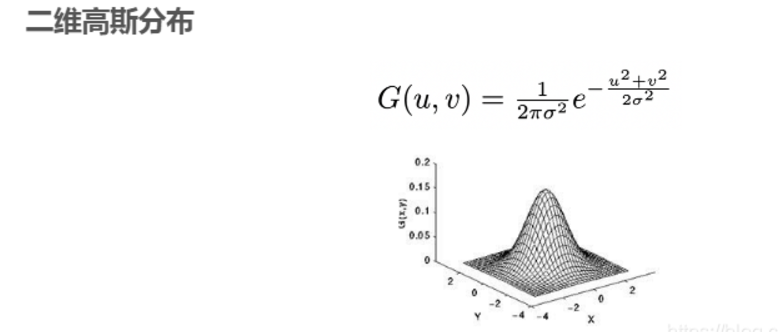

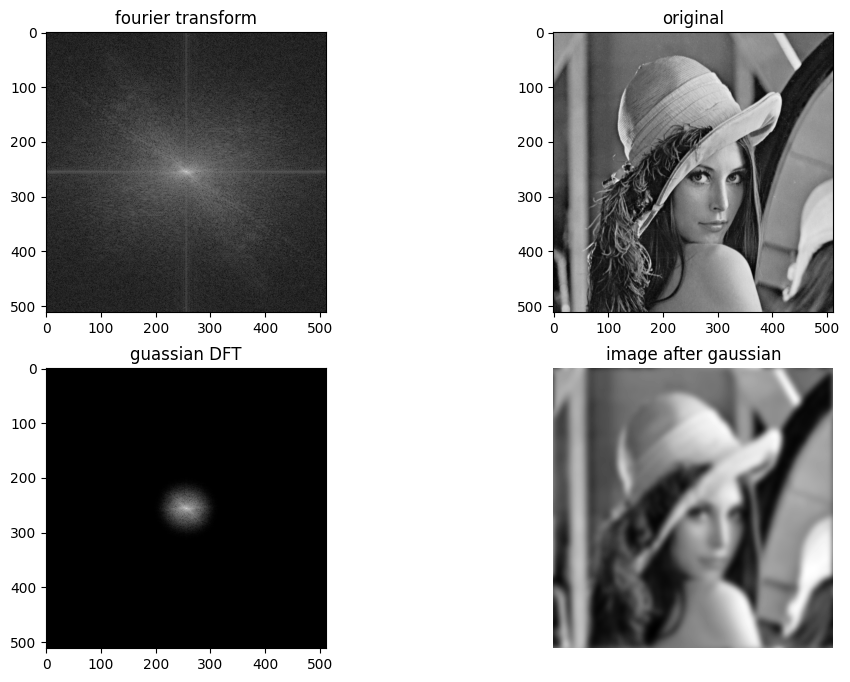

execution time: 0.900553 秒


In [19]:
from numpy.fft import *
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,exposure
import time

start_time=time.process_time()  #start timming
img = io.imread('lena.png',as_gray="True")
ar = np.arange(-256,256)#建立256*256的坐標矩陣
x,y = np.meshgrid(ar,ar)

sigma=15
gaussian=np.exp((-(x**2 +y**2) )/(2 * sigma**2))
img_DFT = fftshift(fft2(img))#use fft to the image
img_DFT_gauss = img_DFT * gaussian#對頻域使用高斯濾波
img_DFT = exposure.rescale_intensity(np.log(1+abs(img_DFT)), out_range=(0.0, 1.0))#abs返回正確的複數值,+1再取log是避免遇到log 0
#img_DFT_gauss = exposure.rescale_intensity(np.log(1+abs(img_DFT_gauss)), out_range=(0.0, 1.0))
final_img=np.abs(ifft2(img_DFT_gauss))#把高斯濾波後的頻率轉換回空間域
fig=plt.figure(figsize=(12, 8))#建立畫布
ax1=fig.add_subplot(2,2,1)
ax1.set_title('fourier transform')

ax2=fig.add_subplot(2,2,2)
ax2.set_title('original')#discrete fourier transform

ax3=fig.add_subplot(2,2,3)
ax3.set_title('guassian DFT')

ax4=fig.add_subplot(2,2,4)
ax4.set_title('image after gaussian')

ax1.imshow(img_DFT,cmap='gray')
ax2.imshow(img,cmap='gray')
ax3.imshow(np.log(1+abs(img_DFT_gauss)),cmap='gray')
ax4.imshow(final_img,cmap='gray')
plt.axis('off')
plt.show()

end_time=time.process_time()# end timing
print(f"execution time: {end_time - start_time:.6f} 秒")

製作一Python程式，使用FFT製作Butterworth濾波器

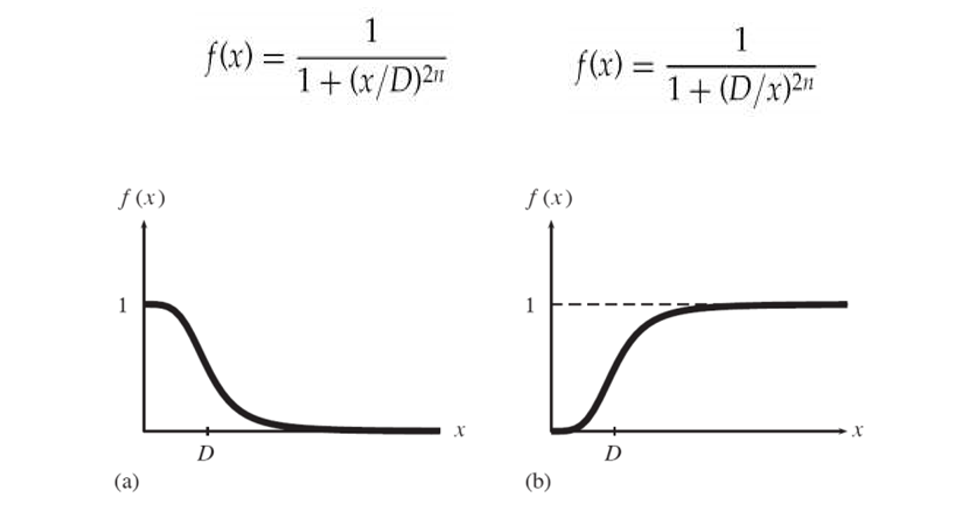

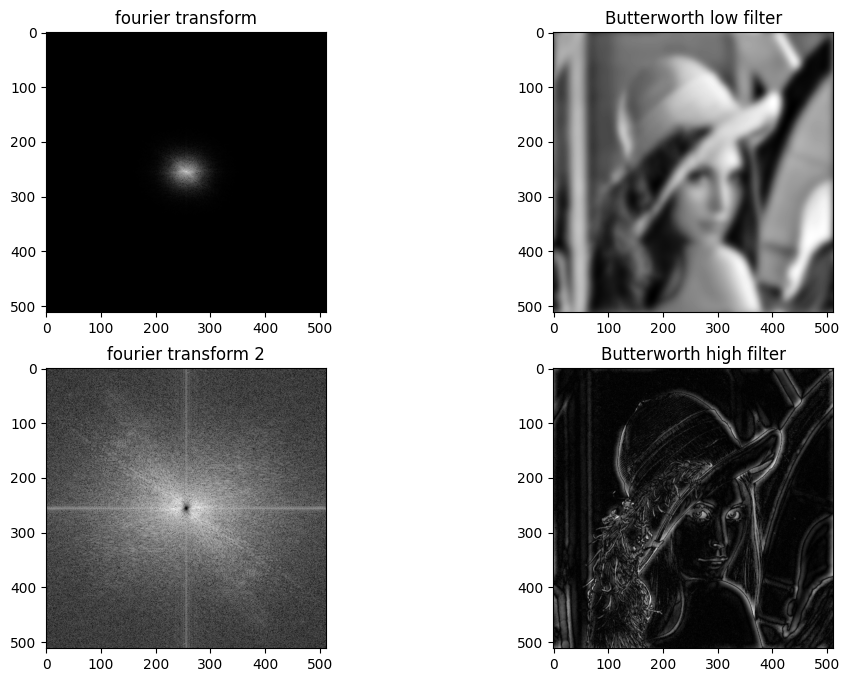

execution time: 1.029352 秒


In [15]:
from skimage import io
from numpy.fft import *
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
import time

start_time=time.process_time()  #start timming
c = io.imread('lena.png',as_gray="True")
cf = fftshift(fft2(c))

ar = np.arange(-256,256)#建立256*256的坐標矩陣
x,y = np.meshgrid(ar,ar)
D=15.0

bl = 1.0/(1.0+((x**2+y**2)/D**2)**2)
bh = 1 - 1.0/(1.0+((x**2+y**2)/D**2)**2)

cfbl = cf*bl#use low pass filter to frequency
cfbh = cf*bh#use high pass filter to frequency

cfblfft = exposure.rescale_intensity(np.log(1+abs(cfbl)), out_range=(0.0, 1.0))#低通濾波後的頻域
cfbhfft = exposure.rescale_intensity(np.log(1+abs(cfbh)), out_range=(0.0, 1.0))#高通濾波後的頻域

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221)
ax1.set_title('fourier transform')
ax1.imshow(cfblfft,cmap='gray')

ax2 = fig.add_subplot(222)
ax2.set_title('Butterworth low filter')
ax2.imshow(np.abs(ifft2(cfbl)), cmap='gray')

ax3 = fig.add_subplot(223)
ax3.set_title('fourier transform 2')
ax3.imshow(cfbhfft,cmap='gray')

ax4 = fig.add_subplot(224)
ax4.set_title('Butterworth high filter')
ax4.imshow(np.abs(ifft2(cfbh)), cmap='gray')
plt.show()

end_time=time.process_time()# end timing
print(f"execution time: {end_time - start_time:.6f} 秒")